# Modelo de Arbol de Decision

In [465]:
# Librerias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Datos Preprocesados de train_data

In [466]:
# cargar datos que cosnideran los valores faltantes
df_prep = pd.read_csv('../Datos_Hackaton/train_data_knn.csv', sep=',')
df_prep

,modalidad_trabajo,genero,canal_reclutamiento,estado_civil,id_colaborador,id_ultimo_jefe,seniority,distancia_oficina,dias_baja_salud,permanencia_promedio,salario,performance_score,psi_score,abandono_6meses,edad_ingreso
0,0,1,0,2,100247.0,102074.0,1.0,2.0,1.0,1.0,140011.0,99.0,75.0,0.0,19.0
1,0,0,0,2,103355.0,102115.0,1.0,1.0,2.0,2.0,182774.0,99.0,81.0,1.0,25.0
2,0,1,4,3,100669.0,102060.0,1.0,5.0,3.0,11.0,682106.0,96.0,74.0,0.0,45.0
3,0,0,2,2,103760.0,102062.0,1.0,13.0,2.0,2.0,270232.0,96.0,82.0,1.0,22.0
4,0,0,2,2,100965.0,102062.0,1.0,13.0,2.0,2.0,266804.0,95.0,82.0,0.0,22.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2147,1,1,3,0,103567.0,102171.0,1.0,2.0,8.0,3.0,281159.0,67.0,65.0,1.0,47.0
2148,1,1,2,0,104098.0,102172.0,1.0,1.0,12.0,13.0,460337.0,75.0,82.0,1.0,47.0
2149,1,0,3,2,103987.0,102155.0,1.0,2.0,1.0,11.0,633879.0,68.0,66.0,1.0,51.0
2150,1,0,3,0,103810.0,102141.0,1.0,6.0,2.0,6.0,793977.0,61.0,80.0,1.0,52.0


## Missing

In [467]:
df_prep.isnull().sum()

modalidad_trabajo       0
genero                  0
canal_reclutamiento     0
estado_civil            0
id_colaborador          0
id_ultimo_jefe          0
seniority               0
distancia_oficina       0
dias_baja_salud         0
permanencia_promedio    0
salario                 0
performance_score       0
psi_score               0
abandono_6meses         0
edad_ingreso            0
dtype: int64

## Transformar variables Categoricas a numericas

In [468]:
# librerias
from sklearn.preprocessing import LabelEncoder

# creamos una clase LabelEncoder
le = LabelEncoder()

# pasamos la variable a convertir a la clase antes definida
df_prep['genero'] = le.fit_transform(df_prep['genero'])

# pasamos la variable a convertir a la clase antes definida
df_prep['modalidad_trabajo'] = le.fit_transform(df_prep['modalidad_trabajo'])

df_prep['canal_reclutamiento'] = le.fit_transform(df_prep['canal_reclutamiento'])

df_prep['estado_civil'] = le.fit_transform(df_prep['estado_civil'])

# Convertimos variables categoricas en numericas con get_dummies
#df_prep = pd.get_dummies(df_prep)
df_prep.head(5)

,modalidad_trabajo,genero,canal_reclutamiento,estado_civil,id_colaborador,id_ultimo_jefe,seniority,distancia_oficina,dias_baja_salud,permanencia_promedio,salario,performance_score,psi_score,abandono_6meses,edad_ingreso
0,0,1,0,2,100247.0,102074.0,1.0,2.0,1.0,1.0,140011.0,99.0,75.0,0.0,19.0
1,0,0,0,2,103355.0,102115.0,1.0,1.0,2.0,2.0,182774.0,99.0,81.0,1.0,25.0
2,0,1,4,3,100669.0,102060.0,1.0,5.0,3.0,11.0,682106.0,96.0,74.0,0.0,45.0
3,0,0,2,2,103760.0,102062.0,1.0,13.0,2.0,2.0,270232.0,96.0,82.0,1.0,22.0
4,0,0,2,2,100965.0,102062.0,1.0,13.0,2.0,2.0,266804.0,95.0,82.0,0.0,22.0


## Analisis de Correlacion

In [469]:
import matplotlib.pyplot as plt

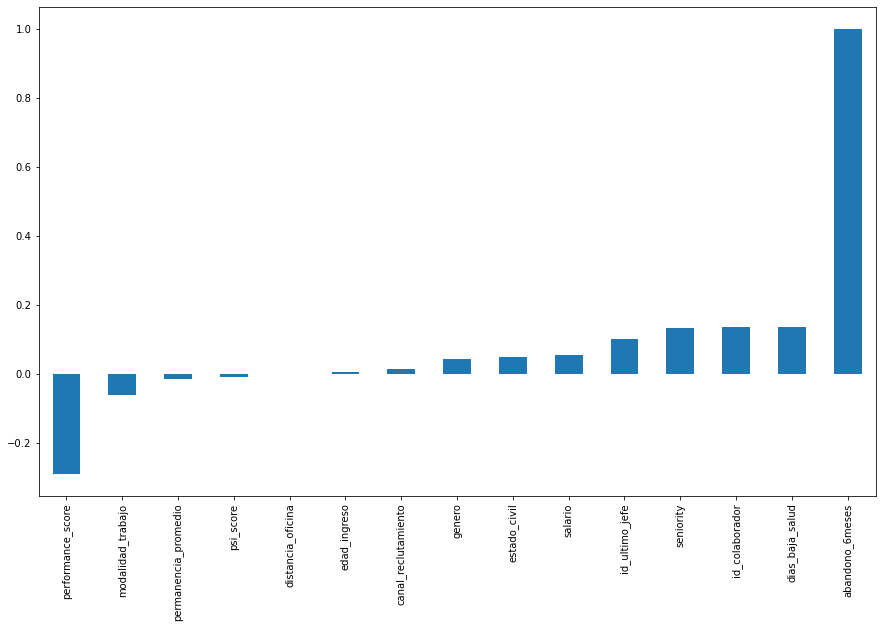

In [470]:
fig = plt.figure(figsize=(15,9))
df_prep.corr()['abandono_6meses'].sort_values(ascending=True).plot(kind='bar')
plt.show()

- La variable **performance_score** es la que mayor correlacion presenta con la variable objetivo
- La variable **dias_baja_salud** es la segunda con mayor correlacion con la variables objetivo
- A pesar que existe correlacion entre algunas variables, esta es baja.

## Seleccion de variables predictoras y objetivo

In [471]:
# variables predictoras
X = df_prep.drop(['abandono_6meses'], axis=1)

# variables objetivo
y = df_prep['abandono_6meses'].values

X

,modalidad_trabajo,genero,canal_reclutamiento,estado_civil,id_colaborador,id_ultimo_jefe,seniority,distancia_oficina,dias_baja_salud,permanencia_promedio,salario,performance_score,psi_score,edad_ingreso
0,0,1,0,2,100247.0,102074.0,1.0,2.0,1.0,1.0,140011.0,99.0,75.0,19.0
1,0,0,0,2,103355.0,102115.0,1.0,1.0,2.0,2.0,182774.0,99.0,81.0,25.0
2,0,1,4,3,100669.0,102060.0,1.0,5.0,3.0,11.0,682106.0,96.0,74.0,45.0
3,0,0,2,2,103760.0,102062.0,1.0,13.0,2.0,2.0,270232.0,96.0,82.0,22.0
4,0,0,2,2,100965.0,102062.0,1.0,13.0,2.0,2.0,266804.0,95.0,82.0,22.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2147,1,1,3,0,103567.0,102171.0,1.0,2.0,8.0,3.0,281159.0,67.0,65.0,47.0
2148,1,1,2,0,104098.0,102172.0,1.0,1.0,12.0,13.0,460337.0,75.0,82.0,47.0
2149,1,0,3,2,103987.0,102155.0,1.0,2.0,1.0,11.0,633879.0,68.0,66.0,51.0
2150,1,0,3,0,103810.0,102141.0,1.0,6.0,2.0,6.0,793977.0,61.0,80.0,52.0


## Escalar los datos

In [472]:
# libreria para escalar datos
from sklearn.preprocessing import MinMaxScaler

In [473]:
# creamos el objeto escalador
scaler = MinMaxScaler()

# pasamos al escalador las variables predictoras
Xs =  scaler.fit_transform(X)

In [474]:
# pasamos las variables predictoras a un dataframe
Xs = pd.DataFrame(Xs)

Xs

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.0,1.0,0.00,0.666667,0.058993,0.430233,0.0,0.095238,0.028571,0.000000,0.034818,1.000000,0.425,0.175439
1,0.0,0.0,0.00,0.666667,0.804317,0.668605,0.0,0.047619,0.057143,0.041667,0.058269,1.000000,0.575,0.280702
2,0.0,1.0,1.00,1.000000,0.160192,0.348837,0.0,0.238095,0.085714,0.416667,0.332104,0.968085,0.400,0.631579
3,0.0,0.0,0.50,0.666667,0.901439,0.360465,0.0,0.619048,0.057143,0.041667,0.106232,0.968085,0.600,0.228070
4,0.0,0.0,0.50,0.666667,0.231175,0.360465,0.0,0.619048,0.057143,0.041667,0.104352,0.957447,0.600,0.228070
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2147,1.0,1.0,0.75,0.000000,0.855156,0.994186,0.0,0.095238,0.228571,0.083333,0.112224,0.659574,0.175,0.666667
2148,1.0,1.0,0.50,0.000000,0.982494,1.000000,0.0,0.047619,0.342857,0.500000,0.210486,0.744681,0.600,0.666667
2149,1.0,0.0,0.75,0.666667,0.955875,0.901163,0.0,0.095238,0.028571,0.416667,0.305656,0.670213,0.200,0.736842
2150,1.0,0.0,0.75,0.000000,0.913429,0.819767,0.0,0.285714,0.057143,0.208333,0.393454,0.595745,0.550,0.754386


In [475]:
# recuperamos los nombres de las variables predictoras
Xs.columns = X.columns
Xs

,modalidad_trabajo,genero,canal_reclutamiento,estado_civil,id_colaborador,id_ultimo_jefe,seniority,distancia_oficina,dias_baja_salud,permanencia_promedio,salario,performance_score,psi_score,edad_ingreso
0,0.0,1.0,0.00,0.666667,0.058993,0.430233,0.0,0.095238,0.028571,0.000000,0.034818,1.000000,0.425,0.175439
1,0.0,0.0,0.00,0.666667,0.804317,0.668605,0.0,0.047619,0.057143,0.041667,0.058269,1.000000,0.575,0.280702
2,0.0,1.0,1.00,1.000000,0.160192,0.348837,0.0,0.238095,0.085714,0.416667,0.332104,0.968085,0.400,0.631579
3,0.0,0.0,0.50,0.666667,0.901439,0.360465,0.0,0.619048,0.057143,0.041667,0.106232,0.968085,0.600,0.228070
4,0.0,0.0,0.50,0.666667,0.231175,0.360465,0.0,0.619048,0.057143,0.041667,0.104352,0.957447,0.600,0.228070
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2147,1.0,1.0,0.75,0.000000,0.855156,0.994186,0.0,0.095238,0.228571,0.083333,0.112224,0.659574,0.175,0.666667
2148,1.0,1.0,0.50,0.000000,0.982494,1.000000,0.0,0.047619,0.342857,0.500000,0.210486,0.744681,0.600,0.666667
2149,1.0,0.0,0.75,0.666667,0.955875,0.901163,0.0,0.095238,0.028571,0.416667,0.305656,0.670213,0.200,0.736842
2150,1.0,0.0,0.75,0.000000,0.913429,0.819767,0.0,0.285714,0.057143,0.208333,0.393454,0.595745,0.550,0.754386


# Datos Preprocesados de test_data

In [476]:
df_test = pd.read_csv('../Datos_Hackaton/test_data_knn.csv', sep=',')
df_test.head()

,modalidad_trabajo,genero,canal_reclutamiento,estado_civil,id_colaborador,id_ultimo_jefe,seniority,distancia_oficina,dias_baja_salud,permanencia_promedio,salario,performance_score,psi_score,edad_ingreso
0,Híbrida,Hombre,Ferias & Networking,Soltero,100486.0,102115.0,1.0,1.0,2.0,2.0,181654.0,99.0,81.0,24.0
1,Híbrida,Mujer,Ferias & Networking,Soltero,103752.0,102074.0,1.0,2.0,1.0,1.0,140986.0,97.0,75.0,19.0
2,Híbrida,Hombre,Portal Web,Soltero,103937.0,102150.0,1.0,2.0,1.0,6.0,406690.0,96.0,69.0,38.0
3,Híbrida,Hombre,Linkedin,Casado,101744.0,102172.0,1.0,2.0,3.0,3.0,249107.0,95.0,73.0,31.0
4,Híbrida,Hombre,Referidos,Viudo,101037.0,102060.0,1.0,5.0,3.0,10.0,698318.0,95.0,81.0,46.0


## Convertir variables categoricas a numericas

In [477]:
# librerias
from sklearn.preprocessing import LabelEncoder

# creamos una clase LabelEncoder
le = LabelEncoder()

# pasamos la variable a convertir a la clase antes definida
df_test['genero'] = le.fit_transform(df_test['genero'])

# pasamos la variable a convertir a la clase antes definida
df_test['modalidad_trabajo'] = le.fit_transform(df_test['modalidad_trabajo'])

df_test['canal_reclutamiento'] = le.fit_transform(df_test['canal_reclutamiento'])

df_test['estado_civil'] = le.fit_transform(df_test['estado_civil'])

# Convertimos variables categoricas en numericas con get_dummies
#df_X = pd.get_dummies(df_X)
df_test.head(5)

,modalidad_trabajo,genero,canal_reclutamiento,estado_civil,id_colaborador,id_ultimo_jefe,seniority,distancia_oficina,dias_baja_salud,permanencia_promedio,salario,performance_score,psi_score,edad_ingreso
0,0,0,0,2,100486.0,102115.0,1.0,1.0,2.0,2.0,181654.0,99.0,81.0,24.0
1,0,1,0,2,103752.0,102074.0,1.0,2.0,1.0,1.0,140986.0,97.0,75.0,19.0
2,0,0,3,2,103937.0,102150.0,1.0,2.0,1.0,6.0,406690.0,96.0,69.0,38.0
3,0,0,2,0,101744.0,102172.0,1.0,2.0,3.0,3.0,249107.0,95.0,73.0,31.0
4,0,0,4,3,101037.0,102060.0,1.0,5.0,3.0,10.0,698318.0,95.0,81.0,46.0


## Seleccion variables

In [478]:
# variables predictoras
#df_X = df_test.drop('id_colaborador', axis=1)
#df_X


## Escalar datos de Test

In [479]:
# creamos el objeto escalador
scaler = MinMaxScaler()

# pasamos al escalador las variables predictoras
Xt =  scaler.fit_transform(df_test)

In [480]:
# pasamos las variables predictoras a un dataframe
Xt = pd.DataFrame(Xt)

# recuperamos los nombres de las variables predictoras
Xt.columns = df_test.columns
Xt

,modalidad_trabajo,genero,canal_reclutamiento,estado_civil,id_colaborador,id_ultimo_jefe,seniority,distancia_oficina,dias_baja_salud,permanencia_promedio,salario,performance_score,psi_score,edad_ingreso
0,0.0,0.0,0.00,0.666667,0.116491,0.668605,0.0,0.071429,0.086957,0.038462,0.058174,1.000000,0.575,0.264151
1,0.0,1.0,0.00,0.666667,0.899329,0.430233,0.0,0.142857,0.043478,0.000000,0.035884,0.894737,0.425,0.169811
2,0.0,0.0,0.75,0.666667,0.943672,0.872093,0.0,0.142857,0.043478,0.192308,0.181516,0.842105,0.275,0.528302
3,0.0,0.0,0.50,0.000000,0.418025,1.000000,0.0,0.142857,0.130435,0.076923,0.095145,0.789474,0.375,0.396226
4,0.0,0.0,1.00,1.000000,0.248562,0.348837,0.0,0.357143,0.130435,0.346154,0.341358,0.789474,0.575,0.679245
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015,1.0,1.0,0.75,0.666667,0.900048,0.936047,0.0,0.214286,0.086957,0.576923,0.342726,0.526316,0.275,0.811321
2016,1.0,1.0,0.75,0.333333,0.953020,0.994186,0.0,0.214286,0.000000,0.153846,0.329712,0.684211,0.200,0.811321
2017,1.0,0.0,0.75,0.666667,0.986337,0.837209,0.0,0.285714,0.043478,0.230769,0.438901,0.210526,0.275,0.811321
2018,1.0,1.0,0.50,0.666667,0.939597,0.883721,0.0,0.500000,0.043478,0.269231,0.352749,0.578947,0.425,0.849057


# Entrenamiento del Modelo

In [481]:
# dividimos los datos en entrenamiento y prueba
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Xs,y, test_size=0.3, random_state=42)

Vamos a conseguir el mejor modelo

In [482]:
#Arbol de Decision
from sklearn.tree import DecisionTreeClassifier

#Creacion del modelo
tree = DecisionTreeClassifier(max_depth=2, random_state=00000)


#Entrenamiento
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=0)

In [483]:
# llamamos las metricas del modelo
from sklearn import metrics

#Calculo de las predicciones en Train y Test
y_train_pred = tree.predict(X_train)
y_test_pred = tree.predict(X_test)

#Calculo de metricas 
from sklearn.metrics import accuracy_score

#Calculo el accuracy en Train
train_accuracy = accuracy_score(y_train, y_train_pred)

#Calculo el accuracy en Test
test_accuracy = accuracy_score(y_test, y_test_pred)

print('El accuracy en train es: ', train_accuracy)
print('El accuracy en test es: ', test_accuracy)

El accuracy en train es:  0.6713147410358565
El accuracy en test es:  0.6424148606811145


# Evaluacion del Modelo

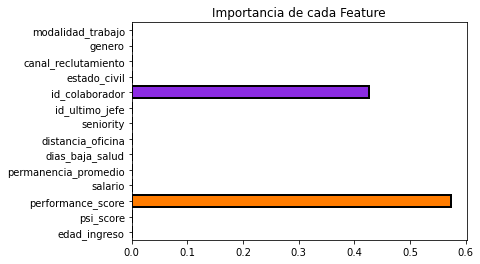

In [484]:
#Verificamos el feature importances
import seaborn as sns

# almacena la importancia de cada features en una variable
importances = tree.feature_importances_

# guardar el nombre de las variables features
columns = Xs.columns

# Grafico
sns.barplot(y=columns, x=importances, palette='bright', saturation=2.0, edgecolor='black', linewidth=2)
plt.title('Importancia de cada Feature');

In [485]:
from sklearn.metrics import confusion_matrix

# Calcular la matriz de confusión
matriz_confusion = confusion_matrix(y_test, y_test_pred)

In [486]:
matriz_confusion

array([[174, 163],
       [ 68, 241]])

<Figure size 792x792 with 0 Axes>

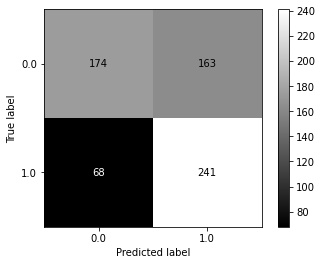

In [487]:
# llamamos el metodo para crear la matriz de confusion
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Size de la grafica
fig = plt.figure(figsize=(11,11))

# creacion de la matriz
cm = confusion_matrix(y_test, y_test_pred, labels=tree.classes_)

# visualizacion de la matriz
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=tree.classes_)
disp.plot(cmap='gray')
plt.show()

In [488]:
# Calcular métricas a partir de la matriz de confusión
TP = cm[1, 1]  # Verdaderos positivos
TN = cm[0, 0]  # Verdaderos negativos
FP = cm[0, 1]  # Falsos positivos
FN = cm[1, 0]  # Falsos negativos

In [489]:
# Calcular precisión, sensibilidad, especificidad, y tasa de error
precision = TP / (TP + FP)
sensibilidad = TP / (TP + FN)
especificidad = TN / (TN + FP)
tasa_error = (FP + FN) / (TP + TN + FP + FN)

# Imprimir las métricas
print("Precisión:", precision)
print("Sensibilidad:", sensibilidad)
print("Especificidad:", especificidad)
print("Tasa de Error:", tasa_error)
print('f1-score: ',(2*precision*sensibilidad)/(precision + sensibilidad))

Precisión: 0.5965346534653465
Sensibilidad: 0.7799352750809061
Especificidad: 0.516320474777448
Tasa de Error: 0.35758513931888547
f1-score:  0.6760168302945302


# Prediccion del modelo para test_data

In [490]:
# creamos la nueva prediccion
prediction_test = tree.predict(Xt)

In [491]:
# convertimos las predicciones a un dataframe
df_pred = pd.DataFrame(prediction_test, columns=['abandono_6meses'])
df_pred.head()

,abandono_6meses
0,0.0
1,1.0
2,1.0
3,0.0
4,0.0


In [492]:
# trae los valores originales de id_colaborador al nuevo dataframe
df_pred['ID'] = df_test['id_colaborador'].values

# reordenar variables
df_pred = df_pred[['ID','abandono_6meses']]

#Convertir valores a formato correcto
df_pred['abandono_6meses'] = df_pred['abandono_6meses'].astype(int)

df_pred

,ID,abandono_6meses
0,100486.0,0
1,103752.0,1
2,103937.0,1
3,101744.0,0
4,101037.0,0
...,...,...
2015,103755.0,1
2016,103976.0,1
2017,104115.0,1
2018,103920.0,1


In [493]:
df_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2020 entries, 0 to 2019
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               2020 non-null   float64
 1   abandono_6meses  2020 non-null   int64  
dtypes: float64(1), int64(1)
memory usage: 31.7 KB


# Exportar Predicciones

In [494]:
# exportar predicciones
#df_pred.to_csv('submission_6.csv', index=False)